In [2]:
from netCDF4 import Dataset
import numpy as np
import glob
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import re
from pathlib import Path
from scipy.interpolate import griddata


In [3]:
elevation_data = data = np.loadtxt('elevation_data.txt')
Long = data[:,0]; Lat = data[:,1]; Elev = data[:,2]; #Variables
pts=100000; #Input the desired number of points here

[x,y]=np.meshgrid(np.linspace(np.min(Long),np.max(Long),int(np.sqrt(pts))),np.linspace(np.min(Lat),np.max(Lat),int(np.sqrt(pts))))
z = griddata((Long, Lat), Elev, (x, y), method='linear')
# x = np.matrix.flatten(x); #Gridded longitude
# y = np.matrix.flatten(y); #Gridded latitude
# z = np.matrix.flatten(z); #Gridded elevation
print(x.shape,y.shape,z.shape)



(316, 316) (316, 316) (316, 316)


['nc_files\\1982-1987.nc', 'nc_files\\1987-1992.nc', 'nc_files\\1992-1997.nc', 'nc_files\\1997-2002.nc', 'nc_files\\2002-2007.nc', 'nc_files\\2007-2012.nc', 'nc_files\\2012-2017.nc', 'nc_files\\2017-2022.nc']
1982-1987
dict_keys(['M2IMNXINT_5_12_4_TQV', 'lat', 'lat_bnds', 'lon', 'lon_bnds'])
(7, 5) (7, 5)


C:\Users\TANMAY~1\AppData\Local\Temp/ipykernel_3900/2806155361.py:59: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  cs = m.pcolor(xi,yi,np.squeeze(p),cmap='jet')


250000 250000


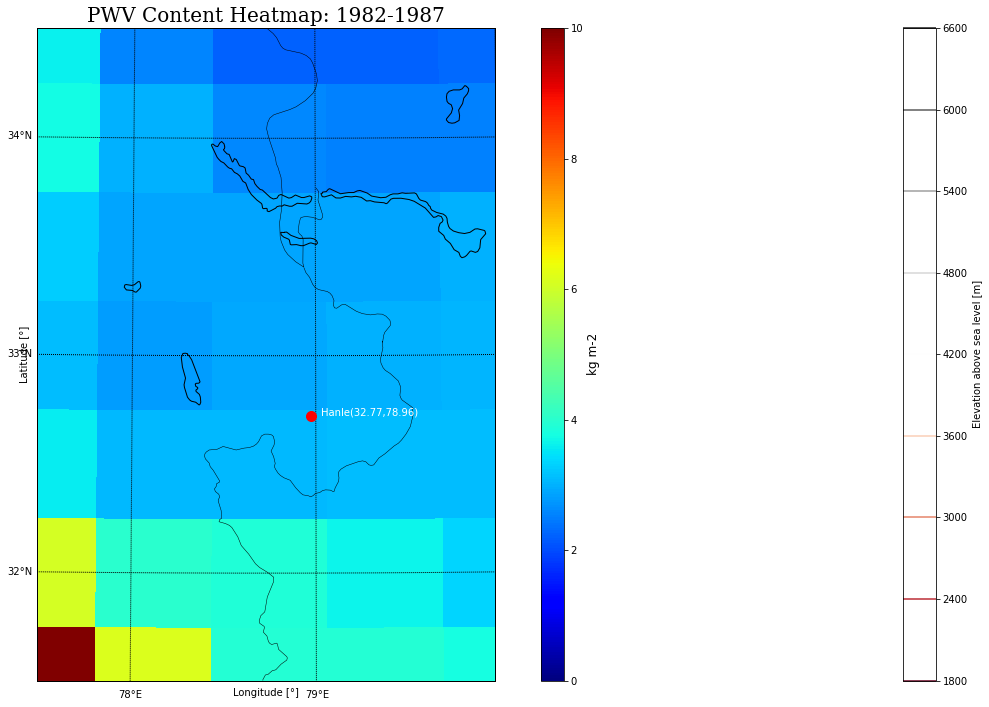

34.5 80.0


In [7]:

files=glob.glob("nc_files\*.nc")
c=0
print(files)
for file in files:
    if(c!=0):
        break

    c+=1

    plt.figure(figsize=(24,12))

    plt.contour((x -  77.3877)/(79.7168- 77.3877)*(250000),(y-31.7131)/(34.24- 31.7131)*(250000),z,cmap='RdGy',zorder=1)
    plt.colorbar(label='Elevation above sea level [m]')
    #plt.plot(78.964,32.779,color='red',marker='o',markersize=10)

    plt.xlabel('Longitude [°]')
    plt.ylabel('Latitude [°]')
    plt.gca().set_aspect('equal')

    
    file_name = Path(file).stem
    print(file_name)
    fh = Dataset(file, mode='r')
    print(fh.variables.keys())

    lons = fh.variables['lon'][:]
    lats = fh.variables['lat'][:]
    lon_bnds = fh.variables['lon_bnds'][:]
    lat_bnds = fh.variables['lat_bnds'][:]
    p = fh.variables['M2IMNXINT_5_12_4_TQV'][:]
    p_units = fh.variables['M2IMNXINT_5_12_4_TQV'].units

    # Get some parameters for the Stereographic Projection
    lon_0 = lons.mean()
    lat_0 = lats.mean()
    lon_min =lons.min()
    lon_max =lons.max()
    lat_min =lats.min()
    lat_max =lats.max()

    
    

    m = Basemap(width= 500000,height=500000,
                resolution='h',projection='tmerc',
                lat_ts=10,lat_0=lat_0,lon_0=lon_0,llcrnrlat=lat_min,llcrnrlon=lon_min,urcrnrlat=lat_max,urcrnrlon=lon_max)
    
    #m.drawmapboundary(fill_color='#F2F2F2')

    # Because our lon and lat variables are 1D,
    # use meshgrid to create 2D arrays
    # Not necessary if coordinates are already in 2D arrays.
    lon, lat = np.meshgrid(lons, lats)
    xi, yi = m(lon, lat)

    print(xi.shape,yi.shape)

    # Plot Data
    cs = m.pcolor(xi,yi,np.squeeze(p),cmap='jet')


    # Add Grid Lines
    m.drawparallels(np.arange(-80., 81., 1.), labels=[1,0,0,0], fontsize=10)
    m.drawmeridians(np.arange(-180., 181., 1.), labels=[0,0,0,1], fontsize=10)

    # Add Coastlines, States, and Country Boundaries
    m.drawcoastlines()
    m.drawstates()
    m.drawcountries()
    m.drawmapboundary(fill_color="#DDEEFF")
    #m.contour()

    # Add Colorbar
    cbar = m.colorbar(cs, location='right', pad="10%")
    plt.clim(0,10)
    cbar.set_label(p_units, fontsize=12)


    #background

    
     


    # Add Title
    plt.title("PWV Content Heatmap: {years}".format(years = file_name),fontdict={'fontsize': '20', 'fontweight' : '3', 'family' : 'serif', 'color' : '#000000', 'verticalalignment' : 'baseline', 'horizontalalignment' : 'center'})
    plt.plot(140000,135000,marker = 'o',color = 'red',markersize = 10)
    plt.text(145000,135000,'Hanle(32.77,78.96)',fontsize = 10,color = 'white')
    print(int(round((lon_0-lon_min)/(lon_max -lon_min),5)*500000),int(round((lat_0-lat_min)/(lat_max -lat_min),5)*500000))
    plt.plot(int(round((lon_0-lon_min)/(lon_max -lon_min),5)*500000),int(round((lat_0-lat_min)/(lat_max -lat_min),5)*500000),marker='X',color='black',markersize=10)





    #plt.savefig(r'D:\OneDrive - IIT Delhi\Intern\RRI\Nc_images'+'\\'+ file_name + '.jpeg',dpi=300)
    plt.show()
    
    print(lats[-1],lons[-1])


    